# Example plot phenotypes

In [21]:
import itertools
import os, sys, glob
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import csv
import PIL
import math
from datetime import datetime
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from scipy import stats
from PIL import Image
from matplotlib import cm

sys.path.insert(0,"/SSD/home/sofia/retina-phenotypes/preprocessing/")
from IDVP import Measure_IDVP

### Command line argumetns

In [22]:
### Select the phenofile you want to plot: 
function_to_execute='tva' # Options: 'taa', 'tva', 'CRAE', 'CRVE', 'bifurcations', 'diameter_variability'

dir_images='/SSD/home/sofia/retina-phenotypes/example/'
aria_measurements_dir = dir_images + str('Lwnet_ARIA_OD_output/')
phenotype_dir = aria_measurements_dir
lwnet_dir = aria_measurements_dir
OD_POSITIONS = lwnet_dir + str('od_all.csv')
df_OD = pd.read_csv(OD_POSITIONS, sep=',')

# R_0 is the initial radius. This value was selected base on the UKBB images
R_0=120 #Need to be tested if the dataset is different (UKBB=240, DRIVE=90)
# Distance between 2 concentrical radius. This value was selected base on the UKBB images
delta=7 #Need to be tested if the dataset is different  (UKBB=10, DRIVE=4)

min_ta=75 #Minor temporal value angle accepted (≈75° based on opthalmological advise)
max_ta=200 #Maximun temporal value angle accepted (≈200° based on opthalmological advise)

#The following values are selected to make a 'majority vote'. Since we are working with Real numbers, we accept they vote for the same if the new values is: upper_accept <= x <= lower_accept (please go to the article/documentation for more detail)
lower_accept=15 #Need to be tested if the dataset is different
upper_accept=2 #Need to be tested if the dataset is different
norm_acceptance=3
neighborhood_cte=5
limit_diameter_main=3
mask_radius=2
plot_phenotypes=True


### Inicializate class

In [23]:

m_idvp = Measure_IDVP( phenotype_dir, aria_measurements_dir, OD_POSITIONS, delta, R_0, min_ta, max_ta, lower_accept, upper_accept, norm_acceptance, neighborhood_cte, limit_diameter_main, mask_radius, plot_phenotypes)

function_to_execute tva
filter_tva_taa -1
imgages_and_filter ['17_test.png', -1]
imageID 17_test filter_type -1


/SSD/home/sofia/retina-phenotypes/preprocessing/IDVP.py:840: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_vote['vote_angle'].loc[i + 1] = j


{'mean_angle': 166.33333333333334}


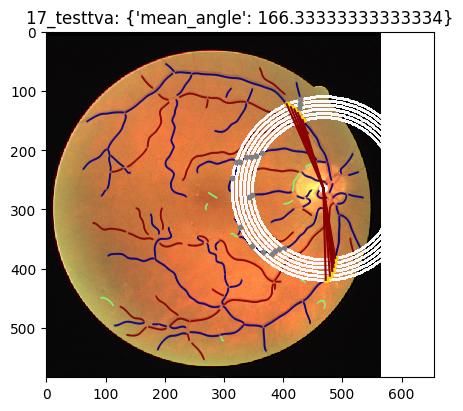

In [24]:
if __name__ == '__main__':
    os.chdir(dir_images) 
    
    for img in glob.glob("*.png"):
        try:
            imageID = os.path.splitext(img)[0]
            num=imageID.split("_")[0]
            
            ### Plot raw image
            fig2 = plt.figure(figsize = (5,5)) # create a 5 x 5 figure 
            ax3 = fig2.add_subplot(111)
            ax3.imshow(mpimg.imread(img), interpolation='none')

            if function_to_execute in {'taa', 'tva'}:
                print('function_to_execute',function_to_execute)
                filter_tva_taa = 1 if function_to_execute == 'taa' else (-1 if function_to_execute == 'tva' else None)
                print('filter_tva_taa',filter_tva_taa)
                imgages_and_filter = list((img, filter_tva_taa))
                print('imgages_and_filter',imgages_and_filter)
                final_angle= m_idvp.main_tva_or_taa(imgages_and_filter)
                print(final_angle)
                plt.title(str(imageID) + str(function_to_execute)+ ': ' + str(final_angle))
            elif function_to_execute in {'CRAE', 'CRVE'}:
                filter_CRAE_CRVE = 1 if function_to_execute == 'CRAE' else (-1 if function_to_execute == 'CRVE' else None)
                imgages_and_filter = list((img, filter_CRAE_CRVE))
                out = m_idvp.main_CRAE_CRVE(imgages_and_filter)
                plt.title(str(imageID) + str(function_to_execute)+ ': ' + str(out))
            elif function_to_execute == 'bifurcations':
                print('img', img)
                out = m_idvp.main_bifurcations(img)
                plt.title(str(imageID) + str(function_to_execute)+ ': ' + str(out))
            else:
                out = None

            plt.show()

        except Exception as e:
            print(e)